# Test di verifica d'ipotesi - Fisher

Il test di verifica di un'ipotesi di Fisher si ispira al principio di falsificabilità di Popper, e può essere riassunto nei seguenti passaggi:
1. formulazione di un'ipotesi falsificabile, definita **ipotesi nulla** $\text{H}_0$, da verificare e che viene ritenuta vera fino a prova contraria
2. scelta di una variabile esplicativa, o **statistica test**, $x$, un parametro disponibile, rilevante per il fenomeno indagato e di cui è nota - o approssimabile, sotto ipotesi ragionevoli sul fenomeno - la distribuzione di probabilità,
   $$p(x|\text{H}_0)$$
3. scelta del **test statistico** (es. una coda o due code,...), in base anche alle caratteristiche del fenomeno indagato
4. scelta del **livello di significatività**, $\alpha$, del test; il valore del livello di significatività traduce "il livello di evidenza richiesto" per falsificare l'ipotesi e - insieme alle caratteristiche del fenomeno e del test - determina le *regioni di rifiuto e di accettazione dell'ipotesi*, gli intervalli di valori della statistica test $x$ che determinano se l'ipotesi è stata falsificata o meno;
5. raccolta dati e **calcolo statistica test sul campione**
6. **confronto** del valore calcolato della statistica test con gli intervalli di rifiuto e accettazione della variabile soggetta all'ipotesi nulla, e **verdetto sull'ipotesi**



## Esempio: moneta truccata o no?

### Formulazione ipotesi nulla e import librerie
Si formula qui l'ipotesi nulla, $\text{H}_0$: "la moneta non è truccata", intendendo che non è truccato nemmeno il lancio della moneta o qualsiasi effetto agente sulla moneta non ha un effetto sulla statistica del lancio.

In [39]:
# import libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


### Definizione variabile casuale - supposta incognita
Lancio della moneta

$$p(X) = \begin{cases} p & , \ X = 0:\text{Head} \\ 1-p & , \ X = 1:\text{Tail} \end{cases}$$

In [54]:
# Initialize numpy default random number generator
rng = np.random.default_rng()

# Set toss random variable

p_head = .5
p_tail = 1. - p_head
a = [0, 1]                   # Outcomes: 0: head, 1: tail
p = [p_head, p_tail]

rng_toss = rng.choice


In [55]:
# Examples
n_tosses = 20
printout = {
    "all": False,
    "summary": True
}

n_tail = 0
for i in np.arange(n_tosses):
    n_tail += rng_toss(a=a,p=p)

print(f"n.tosses: {n_tosses}")
print(f"n.tails : {n_tail}")

n.tosses: 20
n.tails : 10


### Test di Fisher

Le scelte di:

- **Ipotesi nulla**, **H0**: la moneta non è truccata. L'**ipotesi alternativa**, **H1**, è la negazione di H0: la moneta è truccata. 

- **Statistica test.** Si intende verificare l'ipotesi H0 usando come parametro di interesse il valore medio dei lancio della moneta, assegnando i valori 0: Head, 1: Tail.

- **Test statistico.** Per la natura del problema si sceglie un test statistico a due code.

- **Livello di significatività.** Si sceglie un livello di significatività pari a $\sigma = .05$.

permettono di determinare:

- le **regioni di accettazione** e **di rifiuto** di H0, gli intervalli di valori del parametro di interesse che portano rispettivamente all'accettazione o al rifiuto dell'ipotesi H0.

Il valore della statistica test calcolato con un campione di dati raccolto permette di stabilire se l'ipotesi H0 deve essere accettata o rigettata.


<BarContainer object of 9 artists>

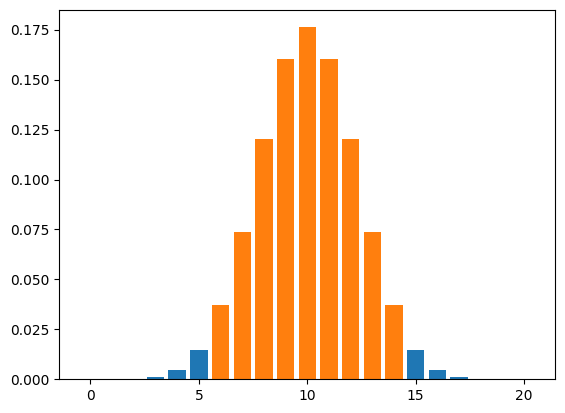

In [58]:
# Sample
# a, p = ...


# Significance level
sigma = .05

# Null hypotesis, H0
kv = np.arange(n_tosses+1)
h0_pdf = sp.stats.binom.pmf(kv, n_tosses, .5)

# Symmetric test: find max and extend acceptance range until sum_k p(k) ~ 1 - sigma
k_max = np.argmax(h0_pdf)
p_acc = h0_pdf[k_max]
k0, k1 = k_max, k_max
k_acc = [ k_max ]

while ( p_acc < 1. - sigma ):    
    k0 -= 1
    k1 += 1

    p_acc = p_acc + h0_pdf[k0] + h0_pdf[k1]
    k_acc += [ k0, k1 ]
    

plt.figure()
plt.bar(kv, h0_pdf)
plt.bar(kv[k_acc], h0_pdf[k_acc])


In [66]:
# Sample
toss_sample = [ rng_toss(a=a,p=p) for s in np.arange(n_tosses) ]
# print(toss_sample)

# Evaluate statistics
x_sample = np.sum(toss_sample)
print(f"Sample x: {x_sample}")

# Evaluate H0
if x_sample in k_acc:
    print("H0 accepted")
else:
    print("H0 rejected")


Sample x: 13
H0 accepted


<BarContainer object of 1 artists>

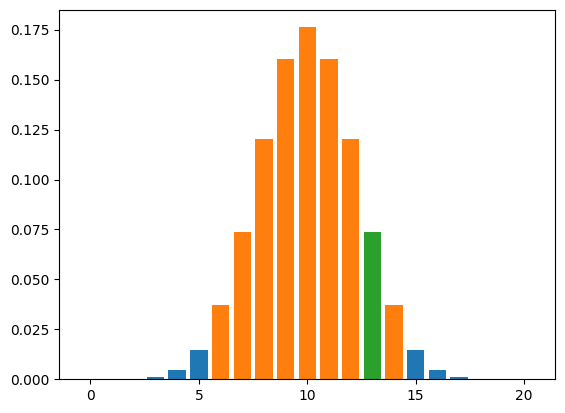

In [67]:

plt.figure()
plt.bar(kv, h0_pdf)
plt.bar(kv[k_acc], h0_pdf[k_acc])
plt.bar(kv[x_sample], h0_pdf[x_sample])